In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder  

### Create variables

### Load Data 

In [3]:
df = pd.read_csv("C:\DevRoot\Dropbox\Py03\MBTI\data\MBTI 500.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [4]:
df.head(5)

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [5]:
df.tail(5)

,posts,type
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP
106066,feel like men good problem tell parent want te...,INFP


 Python pandas 모듈의 DataFrame.sample() 메소드를 사용해서 DataFrame으로 부터 무작위 (확률, 임의) 표본 추출 (random sampling) 하는 방법을 소개하겠습니다.


(1) DataFrame으로 부터 특정 개수의 표본을 무작위로 추출하기 (number)

(2) DataFrame으로 부터 특정 비율의 표본을 무작위로 추출하기 (fraction)

(3) DataFrame으로 부터 복원 무작위 표본 추출하기 (random sampling with replacement)

(4) DataFrame으로 부터 가중치를 부여하여 표본 추출하기 (weights)

(5) DataFrame으로 부터 칼럼에 대해 무작위 표본 추출하기 (axis=1, axis='column)

(6) DataFrame으로 부터 특정 칼럼에 대해 무작위 표본 추출한 결과를 numpy array로 할당하기

In [6]:
df_train = df.sample(frac=0.5, random_state=5).copy()
df_val_test = df.drop(df_train.index).copy()
df_val = df_val_test.sample(frac=0.5, random_state=5).copy()
df_test=df_val_test.drop(df_val.index).copy()

In [9]:
labels_train = df_train['type'].values
data_train = df_train['posts'].values

labels_val = df_val['type'].values
data_val = df_val['posts'].values

labels_test = df_test['type'].values
data_test = df_test['posts'].values

# 카테고리형 데이터를 수치형으로 변환
le = LabelEncoder()
en_labels_train = le.fit_transform(labels_train)
en_labels_val = le.transform(labels_val)
en_labels_test = le.transform(labels_test)

Text(0.5, 1.0, 'Count of types')

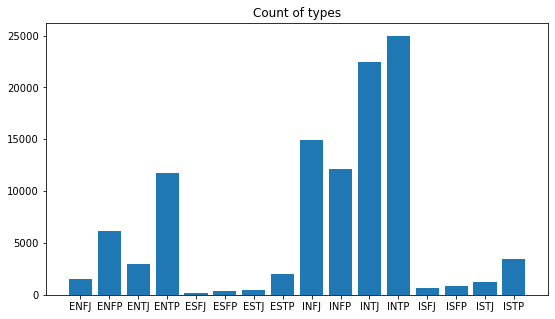

In [13]:
unique_labels, count = np.unique(df['type'], return_counts=True)
fig = plt.figure(figsize=(9,5))
plt.bar(unique_labels, count, width=0.8)
plt.title("Count of types")

# Tokenize data

In [14]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(data_train)